<a href="https://colab.research.google.com/github/mayvid9/Advance-Machine-Learning/blob/master/TMDB_Challenge1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Setting Up Kaggle environment

In [0]:
import json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kartiktyagi4282","key":"1168d6b336b726490019f9950077105d"}'}

In [0]:
!mkdir -p ~/.kaggle

In [0]:
!cp kaggle.json ~/.kaggle/

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!ls ~/.kaggle

kaggle.json


In [0]:
!pip install -q kaggle
!pip install -q kaggle-cli

    100% |████████████████████████████████| 81kB 3.8MB/s 
    100% |████████████████████████████████| 5.3MB 4.4MB/s 
    100% |████████████████████████████████| 51kB 19.7MB/s 
    100% |████████████████████████████████| 92kB 26.8MB/s 


In [0]:
!kaggle datasets list

ref                                                          title                                                size  lastUpdated          downloadCount  
-----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
ronitf/heart-disease-uci                                     Heart Disease UCI                                     3KB  2018-06-25 11:33:56          31616  
karangadiya/fifa19                                           FIFA 19 complete player dataset                       2MB  2018-12-21 03:52:59          23307  
russellyates88/suicide-rates-overview-1985-to-2016           Suicide Rates Overview 1985 to 2016                 396KB  2018-12-01 19:18:25          22474  
bigquery/crypto-ethereum-classic                             Ethereum Classic Blockchain                          70GB  2019-03-20 23:21:25              0  
iarunava/cell-images-for-detecting-malaria                

In [0]:
!kaggle competitions list

ref                                                deadline             category            reward  teamCount  userHasEntered  
-------------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
digit-recognizer                                   2030-01-01 00:00:00  Getting Started  Knowledge       2875           False  
titanic                                            2030-01-01 00:00:00  Getting Started  Knowledge      11162           False  
house-prices-advanced-regression-techniques        2030-01-01 00:00:00  Getting Started  Knowledge       4275           False  
imagenet-object-localization-challenge             2029-12-31 07:00:00  Research         Knowledge         40           False  
competitive-data-science-predict-future-sales      2019-12-31 23:59:00  Playground           Kudos       2801            True  
two-sigma-financial-news                           2019-07-15 23:59:00  Featured          $100,000      

In [0]:
!kaggle competitions download -c tmdb-box-office-prediction -p /content/kaggle/tmdb

  0% 0.00/60.1k [00:00<?, ?B/s]
100% 60.1k/60.1k [00:00<00:00, 55.7MB/s]
 71% 5.00M/7.02M [00:00<00:00, 20.0MB/s]
100% 7.02M/7.02M [00:00<00:00, 23.4MB/s]
 48% 5.00M/10.3M [00:00<00:00, 38.1MB/s]
100% 10.3M/10.3M [00:00<00:00, 66.0MB/s]


In [0]:
import os
os.chdir('kaggle/tmdb')
!unzip \*.zip

Archive:  test.csv.zip
  inflating: test.csv                

Archive:  train.csv.zip
  inflating: train.csv               

2 archives were successfully processed.


### Importing Libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import ast
from tqdm import tqdm
import time
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [0]:
import os
os.chdir('kaggle/tmdb')
os.listdir()

['test.csv',
 'sample_submission.csv',
 'test.csv.zip',
 'train.csv',
 'pred.csv',
 'train.csv.zip']

In [0]:
test=pd.read_csv('./test.csv')
train=pd.read_csv('./train.csv') 

### Exploring DataFrame and mean and variance 

In [0]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [0]:
test.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [0]:
train.shape

(3000, 23)

In [0]:
train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

In [0]:
train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

In [0]:
train.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [0]:
train.isnull().sum() 

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [0]:
test.isnull().sum() 

id                          0
belongs_to_collection    3521
budget                      0
genres                     16
homepage                 2978
imdb_id                     0
original_language           0
original_title              0
overview                   14
popularity                  0
poster_path                 1
production_companies      258
production_countries      102
release_date                1
runtime                     4
spoken_languages           42
status                      2
tagline                   863
title                       3
Keywords                  393
cast                       13
crew                       22
dtype: int64

In [0]:
train['belongs_to_collection'][0]

"[{'id': 313576, 'name': 'Hot Tub Time Machine Collection', 'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg', 'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'}]"

In [0]:
train.drop(['poster_path','imdb_id','original_title',],axis=1,inplace=True)
test.drop(['poster_path','imdb_id','original_title',],axis=1,inplace=True)

### Data Cleaning revenue and budget

In [0]:
# First we have discovered that some films have really strange values such as runtime which are films that has 0 minutes of runtime what is completely impossible
#and that info is public and been released before the movie so we can deploy it manually in our model
# train
train.loc[train['id'] == 16,'revenue'] = 192864          # Skinning
train.loc[train['id'] == 90,'budget'] = 30000000         # Sommersby          
train.loc[train['id'] == 118,'budget'] = 60000000        # Wild Hogs
train.loc[train['id'] == 149,'budget'] = 18000000        # Beethoven
train.loc[train['id'] == 313,'revenue'] = 12000000       # The Cookout 
train.loc[train['id'] == 451,'revenue'] = 12000000       # Chasing Liberty
train.loc[train['id'] == 464,'budget'] = 20000000        # Parenthood
train.loc[train['id'] == 470,'budget'] = 13000000        # The Karate Kid, Part II
train.loc[train['id'] == 513,'budget'] = 930000          # From Prada to Nada
train.loc[train['id'] == 797,'budget'] = 8000000         # Welcome to Dongmakgol
train.loc[train['id'] == 819,'budget'] = 90000000        # Alvin and the Chipmunks: The Road Chip
train.loc[train['id'] == 850,'budget'] = 90000000        # Modern Times
train.loc[train['id'] == 1112,'budget'] = 7500000        # An Officer and a Gentleman
train.loc[train['id'] == 1131,'budget'] = 4300000        # Smokey and the Bandit   
train.loc[train['id'] == 1359,'budget'] = 10000000       # Stir Crazy 
train.loc[train['id'] == 1542,'budget'] = 1              # All at Once
train.loc[train['id'] == 1542,'budget'] = 15800000       # Crocodile Dundee II
train.loc[train['id'] == 1571,'budget'] = 4000000        # Lady and the Tramp
train.loc[train['id'] == 1714,'budget'] = 46000000       # The Recruit
train.loc[train['id'] == 1721,'budget'] = 17500000       # Cocoon
train.loc[train['id'] == 1865,'revenue'] = 25000000      # Scooby-Doo 2: Monsters Unleashed
train.loc[train['id'] == 2268,'budget'] = 17500000       # Madea Goes to Jail budget
train.loc[train['id'] == 2491,'revenue'] = 6800000       # Never Talk to Strangers
train.loc[train['id'] == 2602,'budget'] = 31000000       # Mr. Holland's Opus
train.loc[train['id'] == 2612,'budget'] = 15000000       # Field of Dreams
train.loc[train['id'] == 2696,'budget'] = 10000000       # Nurse 3-D
train.loc[train['id'] == 2801,'budget'] = 10000000       # Fracture
#test
test.loc[test['id'] == 3889,'budget'] = 15000000       # Colossal
test.loc[test['id'] == 6733,'budget'] = 5000000        # The Big Sick
test.loc[test['id'] == 3197,'budget'] = 8000000        # High-Rise
test.loc[test['id'] == 6683,'budget'] = 50000000       # The Pink Panther 2
test.loc[test['id'] == 5704,'budget'] = 4300000        # French Connection II
test.loc[test['id'] == 6109,'budget'] = 281756         # Dogtooth
test.loc[test['id'] == 7242,'budget'] = 10000000       # Addams Family Values
test.loc[test['id'] == 7021,'budget'] = 17540562       #  Two Is a Family
test.loc[test['id'] == 5591,'budget'] = 4000000        # The Orphanage
test.loc[test['id'] == 4282,'budget'] = 20000000       # Big Top Pee-wee

### Fixing some runtimes of movies

In [0]:
# TRAIN 

train.runtime[train.id == 391] = 86 #Il peor natagle de la meva vida
train.runtime[train.id == 592] = 90 #А поутру они проснулись
train.runtime[train.id == 925] = 95 #¿Quién mató a Bambi?
train.runtime[train.id == 978] = 93 #La peggior settimana della mia vita
train.runtime[train.id == 1256] = 92 #Cipolla Colt
train.runtime[train.id == 1542] = 93 #Все и сразу
train.runtime[train.id == 1875] = 86 #Vermist
train.runtime[train.id == 2151] = 108 #Mechenosets
train.runtime[train.id == 2499] = 108 #Na Igre 2. Novyy Uroven
train.runtime[train.id == 2646] = 98 #同桌的妳
train.runtime[train.id == 2786] = 111 #Revelation
train.runtime[train.id == 2866] = 96 #Tutto tutto niente niente

# TEST
test.runtime[test.id == 4074] = 103 #Shikshanachya Aaicha Gho
test.runtime[test.id == 4222] = 93 #Street Knight
test.runtime[test.id == 4431] = 100 #Плюс один
test.runtime[test.id == 5520] = 86 #Glukhar v kino
test.runtime[test.id == 5845] = 83 #Frau Müller muss weg!
test.runtime[test.id == 5849] = 140 #Shabd
test.runtime[test.id == 6210] = 104 #Le dernier souffle
test.runtime[test.id == 6804] = 145 #Chaahat Ek Nasha..
test.runtime[test.id == 7321] = 87 #El truco del manco

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ip

In [0]:
#Let´s fix the revenue for those films which revenue and budget are significantlly low

power_six = train.id[train.budget > 1000][train.revenue < 100]
                             #I think this is not right better option would be to use public info available on imdb as done for in above code:)
for k in power_six :
     train.loc[train['id'] == k,'revenue'] =  train.loc[train['id'] == k,'revenue'] * 1000000

In [0]:
power_six

1006    1007
1281    1282
1541    1542
1884    1885
2090    2091
Name: id, dtype: int64

In [0]:
for i in power_six:
  print(train[train['id']==i][['title','revenue','budget','release_date']])

            title   revenue   budget release_date
1006  Zyzzyx Road  30000000  2000000      2/25/06
                   title   revenue   budget release_date
1281  Death at a Funeral  46000000  9000000       2/9/07
            title  revenue    budget release_date
1541  All at Once  3000000  15800000       6/5/14
           title   revenue    budget release_date
1884  In the Cut  23000000  12000000       9/9/03
         title   revenue    budget release_date
2090  Deadfall  18000000  10000000      10/8/93


### Exploring Belongs_to_collection and homepage column

In [0]:
# belongs to collection or not
train['belongs_to_collection'] = train['belongs_to_collection'].apply(lambda x: 1 if not pd.isnull(x) else 0)
test['belongs_to_collection'] = test['belongs_to_collection'].apply(lambda x: 1 if not pd.isnull(x) else 0)
# homepage available or not
train['homepage'] = train['homepage'].apply(lambda x: 1 if not pd.isnull(x) else 0)
test['homepage'] = test['homepage'].apply(lambda x: 1 if not pd.isnull(x) else 0)

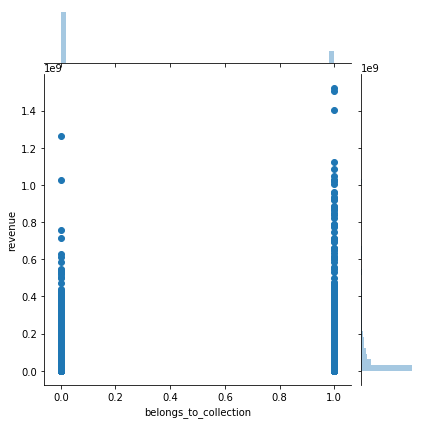

In [0]:
sns.jointplot(x=train['belongs_to_collection'],y=train['revenue'])

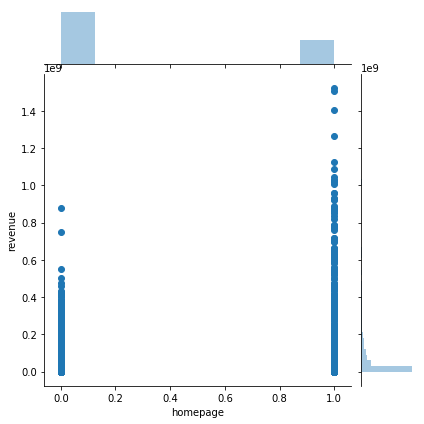

In [0]:
sns.jointplot(x=train['homepage'],y=train['revenue'])

In [0]:
train.corr()

,id,belongs_to_collection,budget,homepage,popularity,runtime,revenue
id,1.000000,-0.010010,0.017519,-0.006177,-0.007470,0.016746,0.000378
belongs_to_collection,-0.010010,1.000000,0.223811,0.060001,0.155896,-0.039934,0.338567
budget,0.017519,0.223811,1.000000,0.247798,0.342584,0.239384,0.754949
homepage,-0.006177,0.060001,0.247798,1.000000,0.164797,0.033635,0.263492
popularity,-0.007470,0.155896,0.342584,0.164797,1.000000,0.129822,0.461486
runtime,0.016746,-0.039934,0.239384,0.033635,0.129822,1.000000,0.220424
revenue,0.000378,0.338567,0.754949,0.263492,0.461486,0.220424,1.000000


### Exploring Tagline And Overview column

In [0]:
# belongs to collection or not
tagline_len_train = train['tagline'].apply(lambda x: len(x) if not pd.isnull(x) else 0)
tagline_len_test = test['tagline'].apply(lambda x: len(x) if not pd.isnull(x) else 0)
# homepage available or not
overview_len_train = train['overview'].apply(lambda x: len(x) if not pd.isnull(x) else 0)
overview_len_test = test['overview'].apply(lambda x: len(x) if not pd.isnull(x) else 0)

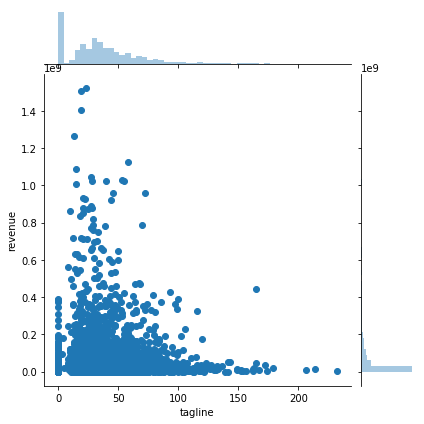

In [0]:
sns.jointplot(x=tagline_len_train,y=train['revenue'])

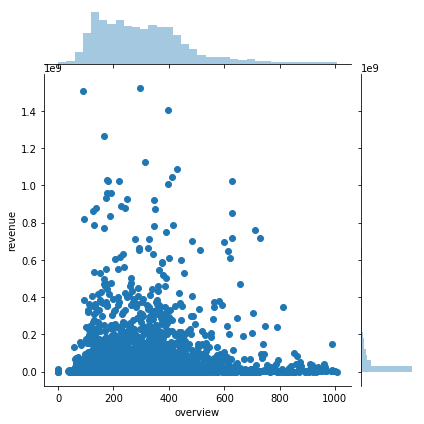

In [0]:
sns.jointplot(x=overview_len_train,y=train['revenue'])
# so much distributed data so no correlation

In [0]:
print(train['revenue'].corr(overview_len_train))
print(train['revenue'].corr(tagline_len_train))

-0.0053929525042464895
0.018318851047144178


In [0]:
# hence there is some patternwith tagline feature but no correlation exists b/w overview length
train['tagline']=tagline_len_train
test['tagline']=tagline_len_test

train.drop(['overview'],axis=1,inplace=True)
test.drop(['overview'],axis=1,inplace=True)

### Exploring Title Column

In [0]:
print(sorted(train['title'].unique()))

["'71", '(500) Days of Summer', '10 Cloverfield Lane', '10 Items or Less', '10 Things I Hate About You', '10 to Midnight', '10,000 BC', '10th & Wolf', '12 Rounds', '13', '13 Assassins', '13 Hours: The Secret Soldiers of Benghazi', '13 Minutes', '1492: Conquest of Paradise', '15 Minutes', '1969', '2 Days in Paris', '20,000 Leagues Under the Sea', '2010', '21', '21 & Over', '21 Grams', '22 Jump Street', '25th Hour', '28 Days Later', '2:22', '3 Braves', '3 Godfathers', '3 Strikes', '300: Rise of an Empire', '31', '4 Months, 3 Weeks and 2 Days', '4.3.2.1', '48 Hrs.', '49 Up', '5 Flights Up', '50 First Dates', '54', '55 Days at Peking', '8MM', '9', 'A Band Called Death', 'A Beautiful Mind', 'A Better Life', 'A Better Tomorrow', 'A Bigger Splash', 'A Bridge Too Far', 'A Case of You', 'A Chorus Line', 'A Cinderella Story', 'A Civil Action', 'A Clockwork Orange', 'A Coffee in Berlin', 'A Company Man', 'A Dirty Shame', "A Dog's Purpose", 'A Farewell to Arms', 'A Few Best Men', 'A Few Good Men',

In [0]:
title_len_train = train['title'].apply(lambda x: len(x) if not pd.isnull(x) else 0)
title_len_test = test['title'].apply(lambda x: len(x) if not pd.isnull(x) else 0)

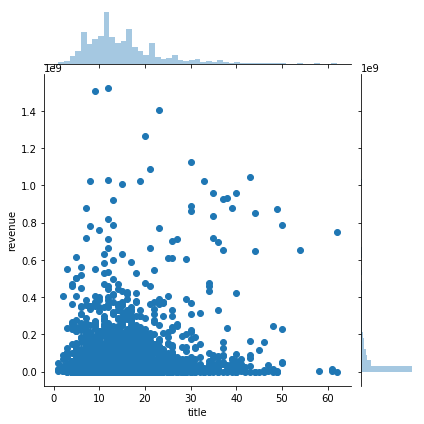

In [0]:
sns.jointplot(x=title_len_train,y=train['revenue'])

In [0]:
# we see good correleation between revenue and title_len
train['revenue'].corr(title_len_train)

0.10884958637921927

In [0]:
train['title_length'] = title_len_train
test['title_length'] = title_len_test
#columns_to_keep.add('title_length')

In [0]:
train.drop(['title'],axis=1,inplace=True)
test.drop(['title'],axis=1,inplace=True)

In [0]:
print(train.columns)

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'original_language', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'Keywords', 'cast', 'crew', 'revenue',
       'title_length'],
      dtype='object')


### is there any use of imdb_id ? will see later..

In [0]:
cnt={}
for i in train['imdb_id']:
    if i[0:4] not in cnt.keys():
        cnt[i[0:4]]=1
    else:
        cnt[i[0:4]]+=1
print(cnt)
print(sorted(cnt.keys()))

{'tt26': 15, 'tt03': 227, 'tt25': 13, 'tt18': 41, 'tt13': 49, 'tt00': 638, 'tt04': 233, 'tt01': 579, 'tt11': 70, 'tt17': 52, 'tt14': 62, 'tt21': 33, 'tt16': 65, 'tt07': 31, 'tt02': 180, 'tt29': 16, 'tt27': 16, 'tt34': 10, 'tt09': 37, 'tt32': 7, 'tt10': 62, 'tt12': 74, 'tt28': 17, 'tt38': 15, 'tt24': 31, 'tt08': 77, 'tt15': 50, 'tt52': 5, 'tt31': 11, 'tt20': 38, 'tt33': 15, 'tt56': 5, 'tt23': 39, 'tt22': 22, 'tt44': 9, 'tt49': 7, 'tt19': 31, 'tt36': 8, 'tt46': 8, 'tt42': 10, 'tt66': 1, 'tt50': 5, 'tt30': 12, 'tt37': 16, 'tt40': 7, 'tt45': 5, 'tt65': 1, 'tt43': 6, 'tt51': 3, 'tt39': 3, 'tt35': 6, 'tt41': 8, 'tt47': 5, 'tt62': 1, 'tt54': 2, 'tt48': 4, 'tt57': 1, 'tt58': 1, 'tt55': 2, 'tt59': 1, 'tt60': 1, 'tt53': 1}
['tt00', 'tt01', 'tt02', 'tt03', 'tt04', 'tt07', 'tt08', 'tt09', 'tt10', 'tt11', 'tt12', 'tt13', 'tt14', 'tt15', 'tt16', 'tt17', 'tt18', 'tt19', 'tt20', 'tt21', 'tt22', 'tt23', 'tt24', 'tt25', 'tt26', 'tt27', 'tt28', 'tt29', 'tt30', 'tt31', 'tt32', 'tt33', 'tt34', 'tt35', 'tt3

In [0]:
len(cnt) 

62

In [0]:
cnt={}
for i in test['imdb_id']:
    if i[0:4] not in cnt.keys():
        cnt[i[0:4]]=1
    else:
        cnt[i[0:4]]+=1
print(cnt)
print(sorted(cnt.keys()))
print(len(cnt))

{'tt12': 103, 'tt00': 945, 'tt01': 839, 'tt04': 364, 'tt15': 92, 'tt02': 239, 'tt36': 22, 'tt03': 329, 'tt08': 102, 'tt22': 49, 'tt10': 83, 'tt17': 81, 'tt21': 43, 'tt19': 53, 'tt29': 19, 'tt23': 71, 'tt38': 13, 'tt18': 55, 'tt16': 95, 'tt32': 19, 'tt09': 73, 'tt07': 40, 'tt13': 85, 'tt33': 20, 'tt11': 105, 'tt45': 9, 'tt20': 37, 'tt40': 15, 'tt14': 87, 'tt30': 21, 'tt34': 18, 'tt25': 27, 'tt24': 30, 'tt49': 4, 'tt27': 19, 'tt41': 14, 'tt56': 3, 'tt31': 15, 'tt47': 9, 'tt42': 14, 'tt35': 16, 'tt28': 17, 'tt46': 9, 'tt37': 21, 'tt43': 10, 'tt54': 4, 'tt26': 12, 'tt58': 2, 'tt48': 9, 'tt60': 1, 'tt39': 4, 'tt59': 2, 'tt51': 4, 'tt53': 4, 'tt57': 3, 'tt50': 6, 'tt44': 7, 'tt52': 3, 'tt62': 2, 'tt55': 1}
['tt00', 'tt01', 'tt02', 'tt03', 'tt04', 'tt07', 'tt08', 'tt09', 'tt10', 'tt11', 'tt12', 'tt13', 'tt14', 'tt15', 'tt16', 'tt17', 'tt18', 'tt19', 'tt20', 'tt21', 'tt22', 'tt23', 'tt24', 'tt25', 'tt26', 'tt27', 'tt28', 'tt29', 'tt30', 'tt31', 'tt32', 'tt33', 'tt34', 'tt35', 'tt36', 'tt37', '

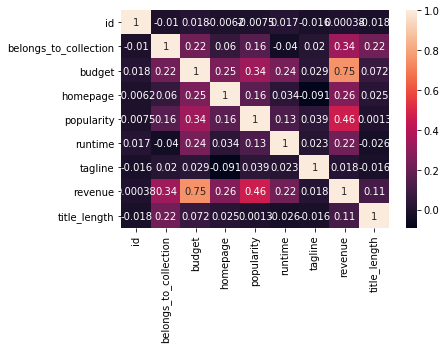

In [0]:
sns.heatmap(train.corr(),annot=True)

### Data Cleaning and Feauture engineering

In [0]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,original_language,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,Keywords,cast,crew,revenue,title_length
0,1,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",0,en,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,52,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,22
1,2,1,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",0,en,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,60,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,40
2,3,0,3300000,"[{'id': 18, 'name': 'Drama'}]",1,en,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,47,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,8
3,4,0,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",1,hi,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,0,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,7
4,5,0,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",0,ko,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,0,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,10


In [0]:
train['genres'][101]

"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]"

In [0]:
train['production_companies'][201]

"[{'name': 'De Laurentiis Entertainment Group (DEG)', 'id': 484}, {'name': 'Kestrel Films', 'id': 27023}, {'name': 'Earth Girls', 'id': 78875}]"

In [0]:
train['production_countries'][201]

"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]"

In [0]:
train['spoken_languages'][201]

"[{'iso_639_1': 'en', 'name': 'English'}]"

In [0]:
train['Keywords'][201]

"[{'id': 246, 'name': 'dancing'}, {'id': 572, 'name': 'sex'}, {'id': 1566, 'name': 'dream'}, {'id': 4344, 'name': 'musical'}, {'id': 6149, 'name': 'police'}, {'id': 7984, 'name': 'bikini'}, {'id': 8181, 'name': 'swimming pool'}, {'id': 9749, 'name': 'beauty salon'}, {'id': 9799, 'name': 'romantic comedy'}, {'id': 9831, 'name': 'spaceship'}, {'id': 9840, 'name': 'romance'}, {'id': 9951, 'name': 'alien'}, {'id': 11128, 'name': 'furry'}, {'id': 11612, 'name': 'hospital'}, {'id': 34130, 'name': 'makeover'}, {'id': 163957, 'name': 'nosy neighbor'}, {'id': 177299, 'name': 'discotheque'}, {'id': 177303, 'name': 'valley girl'}]"

In [0]:
train['cast'][201]

'[{\'cast_id\': 9, \'character\': \'Valerie\', \'credit_id\': \'52fe4341c3a36847f804639b\', \'gender\': 1, \'id\': 16935, \'name\': \'Geena Davis\', \'order\': 0, \'profile_path\': \'/6b8cRJOItz7yNpYuLCPkl5kv4m2.jpg\'}, {\'cast_id\': 10, \'character\': \'Mac\', \'credit_id\': \'52fe4341c3a36847f804639f\', \'gender\': 2, \'id\': 4785, \'name\': \'Jeff Goldblum\', \'order\': 1, \'profile_path\': \'/w9frUiRJUyRnWvFqihtS31q6LWc.jpg\'}, {\'cast_id\': 11, \'character\': \'Zeebo\', \'credit_id\': \'52fe4341c3a36847f80463a3\', \'gender\': 2, \'id\': 22675, \'name\': \'Damon Wayans\', \'order\': 3, \'profile_path\': \'/pdSOalf1r7GKlcUhpKeBntAqgA6.jpg\'}, {\'cast_id\': 17, \'character\': \'Cindy\', \'credit_id\': \'52fe4341c3a36847f80463b9\', \'gender\': 1, \'id\': 40680, \'name\': \'Julie Brown\', \'order\': 4, \'profile_path\': \'/8a1NwjIyjOWmYTqdj4fuxqKlzR5.jpg\'}, {\'cast_id\': 13, \'character\': \'Woody\', \'credit_id\': \'52fe4341c3a36847f80463a7\', \'gender\': 2, \'id\': 21731, \'name\': 

In [0]:
train['crew'][201]

"[{'credit_id': '577ae729c3a36824260008e9', 'department': 'Art', 'gender': 2, 'id': 4248, 'job': 'Production Design', 'name': 'Dennis Gassner', 'profile_path': None}, {'credit_id': '577ae706c3a3682433000943', 'department': 'Editing', 'gender': 2, 'id': 1918, 'job': 'Editor', 'name': 'Richard Halsey', 'profile_path': None}, {'credit_id': '52fe4341c3a36847f8046391', 'department': 'Sound', 'gender': 2, 'id': 4613, 'job': 'Original Music Composer', 'name': 'Nile Rodgers', 'profile_path': '/bD5bQNACHNhIey4EwixVQIyHQwk.jpg'}, {'credit_id': '577ae6e79251415aed00094b', 'department': 'Production', 'gender': 2, 'id': 6870, 'job': 'Line Producer', 'name': 'Duncan Henderson', 'profile_path': None}, {'credit_id': '577ae690c3a368242e00093b', 'department': 'Writing', 'gender': 1, 'id': 40680, 'job': 'Writer', 'name': 'Julie Brown', 'profile_path': '/8a1NwjIyjOWmYTqdj4fuxqKlzR5.jpg'}, {'credit_id': '52fe4341c3a36847f80463b1', 'department': 'Production', 'gender': 0, 'id': 12847, 'job': 'Casting', 'nam

### One hot encoding status column

In [0]:
train['status'].value_counts()

Released    2996
Rumored        4
Name: status, dtype: int64

In [0]:
test['status'].value_counts()

Released           4389
Post Production       5
Rumored               2
Name: status, dtype: int64

In [0]:
train['status'].fillna('Released',inplace=True)
test['status'].fillna('Released',inplace=True)

In [0]:
print(train.isnull().sum())

id                         0
belongs_to_collection      0
budget                     0
genres                     7
homepage                   0
original_language          0
popularity                 0
production_companies     156
production_countries      55
release_date               0
runtime                    2
spoken_languages          20
status                     0
tagline                    0
Keywords                 276
cast                      13
crew                      16
revenue                    0
title_length               0
dtype: int64


In [0]:
total_unique_values=['Released','Rumored','Post Production']

In [0]:
for val in total_unique_values:
    train['status_'+val] = train['status'].apply(lambda x: 1 if val == x else 0)

In [0]:
for val in total_unique_values:
    test['status_'+val] = test['status'].apply(lambda x: 1 if val == x else 0)

In [0]:
train.drop(['status'],axis=1,inplace=True)
test.drop(['status'],axis=1,inplace=True)

In [0]:
train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'original_language', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'tagline', 'Keywords', 'cast', 'crew', 'revenue', 'title_length',
       'status_Released', 'status_Rumored', 'status_Post Production'],
      dtype='object')

### One hot encoding original_language column

In [0]:
total_lang=list(train['original_language'])
len(total_lang)

3000

In [0]:
total_lang+=list(test['original_language'])
len(total_lang)

7398

In [0]:
top_values = [m[0] for m in Counter([j for j in total_lang]).most_common(20)]

In [0]:
top_values
# we can divide it

['en',
 'fr',
 'hi',
 'ru',
 'es',
 'ja',
 'it',
 'ko',
 'de',
 'zh',
 'cn',
 'ta',
 'sv',
 'da',
 'pt',
 'ml',
 'nl',
 'tr',
 'te',
 'ro']

In [0]:
dat={'lan':[],'rev':[]}

for i in range(train.shape[0]):
    (lan,rev)=train.iloc[i][['original_language','revenue']]
    if lan in top_values:
        #print(lan,rev)
        dat['lan'].append(lan)
        dat['rev'].append(rev)
        
rev_top_lang=pd.DataFrame(data=dat)

In [0]:
rev_top_lang.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
lan,en,en,en,hi,ko,en,en,en,en,en,en,en,en,en,en,en,en,en,en,en
rev,12314651,95149435,13092000,16000000,3923970,3261638,85446075,2586511,34327391,18750246,117235147,22642033,356296601,95226116,358372926,57891803,1234254,1749457,85167639,136159423


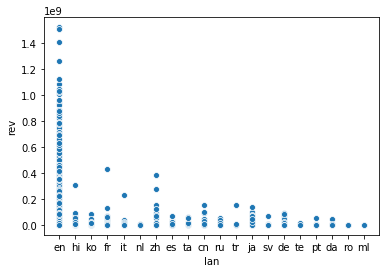

In [0]:
ax = sns.scatterplot(x="lan", y="rev",data=rev_top_lang)

In [0]:
train['orig_lang_en'] = train['original_language'].apply(lambda x: 1 if x == 'en' else 0)

train['orig_lang_fr_hi_ru_es_ja'] = train['original_language'].apply(lambda x: 1 if x == 'fr' or x == 'hi' or x == 'ru' or x == 'es' or x == 'ja' else 0)

train['orig_lang_it_ko_de_zh_cn'] = train['original_language'].apply(lambda x: 1 if x == 'it' or x == 'ko' or x == 'de' or x == 'zh' or x == 'cn' else 0)

train['orig_lang_smallind'] = train['original_language'].apply(lambda x: 1 if x!='en' and x!='it' and x!='ko' and x!='de' and x!='zh' and x!='cn' and  x!='fr' and x!='hi' and x!='ru' and x!='es' and x!='ja' else 0)

In [0]:
test['orig_lang_en'] = test['original_language'].apply(lambda x: 1 if x == 'en' else 0)
test['orig_lang_fr_hi_ru_es_ja'] = test['original_language'].apply(lambda x: 1 if x == 'fr' or x == 'hi' or x == 'ru' or x == 'es' or x == 'ja' else 0)
test['orig_lang_it_ko_de_zh_cn'] = test['original_language'].apply(lambda x: 1 if x == 'it' or x == 'ko' or x == 'de' or x == 'zh' or x == 'cn' else 0)
test['orig_lang_smallind'] = test['original_language'].apply(lambda x: 1 if x!='en' and x!='it' and x!='ko' and x!='de' and x!='zh' and x!='cn' and  x!='fr' and x!='hi' and x!='ru' and x!='es' and x!='ja' else 0)

In [0]:
train.drop(['original_language'],axis=1,inplace=True)
test.drop(['original_language'],axis=1,inplace=True)

In [0]:
print(train.columns)

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'runtime', 'spoken_languages', 'tagline', 'Keywords',
       'cast', 'crew', 'revenue', 'title_length', 'status_Released',
       'status_Rumored', 'status_Post Production', 'orig_lang_en',
       'orig_lang_fr_hi_ru_es_ja', 'orig_lang_it_ko_de_zh_cn',
       'orig_lang_smallind'],
      dtype='object')


### feature engineering release_date column

In [0]:
train['release_date'].describe()

count        3000
unique       2398
top       9/10/15
freq            5
Name: release_date, dtype: object

In [0]:
#as year is in yy format we have to handle movies after 20xx.So this method will help to add century to year
def clean_date(date):
    year = date.split('/')[2]
    if int(year) <= 19:
        return date[:-2] + '20' + year
    else:
        return date[:-2] + '19' + year

In [0]:
#There is one null value in test set
test.loc[test['release_date'].isnull() == True]['id']

828    3829
Name: id, dtype: int64

In [0]:
# when found on the internet it is released on 05/01/00 in 2000
test.loc[test['release_date'].isnull() == True, 'release_date'] = '05/01/00'

In [0]:
train['release_date'] = train['release_date'].apply(lambda x:clean_date(x))
test['release_date'] = test['release_date'].apply(lambda x:clean_date(x))
train['release_date'] = pd.to_datetime(train['release_date'])
test['release_date'] = pd.to_datetime(test['release_date'])

In [0]:
#get time period features from date value
def date_features(dataset):
    
    date_sections = ["year", "weekday", "month"]
    for sec in date_sections:
        section_col = 'release_date' + "_" + sec
        if sec == "year":
            dataset["release_date_years_passed"] = 2019-getattr(dataset['release_date'].dt, sec).astype(int)
        else:
            dataset[section_col] = getattr(dataset['release_date'].dt, sec).astype(int)
    return dataset


In [0]:
train = date_features(train)
test = date_features(test)

In [0]:
# dummy month
dummies = pd.get_dummies(train['release_date_month'] ,drop_first=True).rename(columns=lambda x: 'month' + str(x))
dummies2 = pd.get_dummies(test['release_date_month'] ,drop_first=True).rename(columns=lambda x: 'month' + str(int(x)))
train = pd.concat([train, dummies], axis=1)
test = pd.concat([test, dummies2], axis = 1)

In [0]:
#dummy day of week
ddow = pd.get_dummies(train['release_date_weekday'] ,drop_first=True).rename(columns=lambda x: 'weekday' + str(x))
ddow2 = pd.get_dummies(test['release_date_weekday'] ,drop_first=True).rename(columns=lambda x: 'weekday' + str(int(x)))
train = pd.concat([train, ddow], axis=1)
test = pd.concat([test, ddow2], axis = 1)

In [0]:
train.drop(['release_date'],axis=1,inplace=True)
test.drop(['release_date'],axis=1,inplace=True)
train.drop(['release_date_weekday'],axis=1,inplace=True)
test.drop(['release_date_weekday'],axis=1,inplace=True)
train.drop(['release_date_month'],axis=1,inplace=True)
test.drop(['release_date_month'],axis=1,inplace=True)

In [0]:
train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'popularity', 'production_companies', 'production_countries', 'runtime',
       'spoken_languages', 'tagline', 'Keywords', 'cast', 'crew', 'revenue',
       'title_length', 'status_Released', 'status_Rumored',
       'status_Post Production', 'orig_lang_en', 'orig_lang_fr_hi_ru_es_ja',
       'orig_lang_it_ko_de_zh_cn', 'orig_lang_smallind',
       'release_date_years_passed', 'month2', 'month3', 'month4', 'month5',
       'month6', 'month7', 'month8', 'month9', 'month10', 'month11', 'month12',
       'weekday1', 'weekday2', 'weekday3', 'weekday4', 'weekday5', 'weekday6'],
      dtype='object')

### exploring budget

In [0]:
train['budget'].describe()

count    3.000000e+03
mean     2.270393e+07
std      3.703865e+07
min      0.000000e+00
25%      0.000000e+00
50%      8.000000e+06
75%      3.000000e+07
max      3.800000e+08
Name: budget, dtype: float64

In [0]:
len(train[train['budget']==0])
# there are 812 rows with 0 budget

797

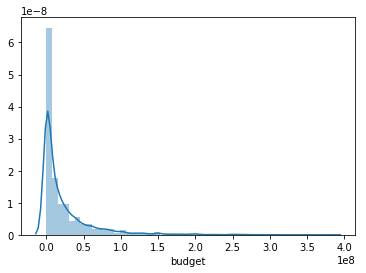

In [0]:
sns.distplot(train['budget'])

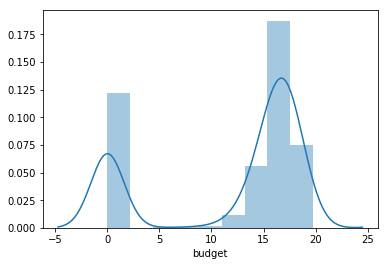

In [0]:
sns.distplot(np.log1p(train['budget']))
# we see so many values near 0

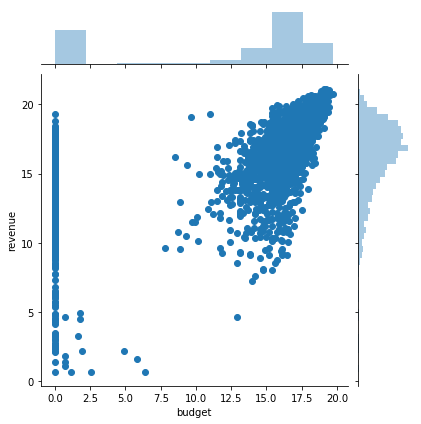

In [0]:
sns.jointplot(x=np.log1p(train['budget']), y=np.log1p(train['revenue']), data=train)

(array([2.407e+03, 3.650e+02, 1.250e+02, 5.500e+01, 2.000e+01, 1.700e+01,
        7.000e+00, 3.000e+00, 0.000e+00, 1.000e+00]),
 array([0.00e+00, 3.80e+07, 7.60e+07, 1.14e+08, 1.52e+08, 1.90e+08,
        2.28e+08, 2.66e+08, 3.04e+08, 3.42e+08, 3.80e+08]),
 <a list of 10 Patch objects>)

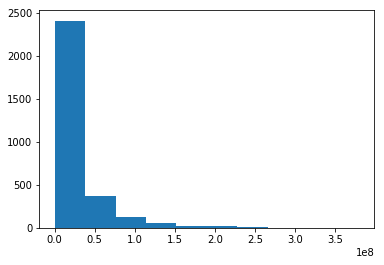

In [0]:
plt.hist(x=train['budget'])
# we see many outliers in budgets we can categorise budget in several categories

In [0]:
train['budget'] = np.log1p(train.budget.values)
test['budget'] = np.log1p(test.budget.values)

### exploring popularity

In [0]:
train.popularity.describe()

count    3000.000000
mean        8.463274
std        12.104000
min         0.000001
25%         4.018053
50%         7.374861
75%        10.890983
max       294.337037
Name: popularity, dtype: float64

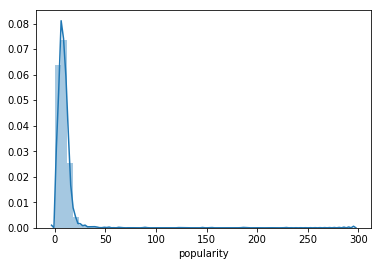

In [0]:
sns.distplot(train.popularity)

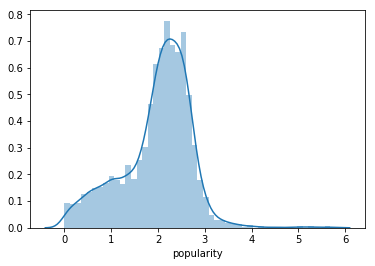

In [0]:
sns.distplot(np.log1p(train.popularity))

In [0]:
train['popularity'] = np.log1p(train.popularity.values)
test['popularity'] = np.log1p(test.popularity.values)

### exploring run time

In [0]:
train['runtime'].describe()

count    2998.000000
mean      108.242161
std        21.020877
min        11.000000
25%        94.000000
50%       104.000000
75%       118.000000
max       338.000000
Name: runtime, dtype: float64

In [0]:
train['runtime'].isnull().sum()

2

In [0]:
test['runtime'].isnull().sum()

4

In [0]:
#replacing with mean
train['runtime'] = train['runtime'].fillna(np.mean(train['runtime']))
test['runtime'] = test['runtime'].fillna(np.mean(test['runtime']))

In [0]:
train[train['runtime']==0].shape[0]

0

In [0]:
test[test['runtime']==0].shape[0]

0

In [0]:
# replacing movies with runtime 0 with mean
#train['runtime'] = train['runtime'].apply(lambda x: np.mean(train['runtime']) if x == 0 else x)
#test['runtime'] = test['runtime'].apply(lambda x: np.mean(test['runtime']) if x == 0 else x)

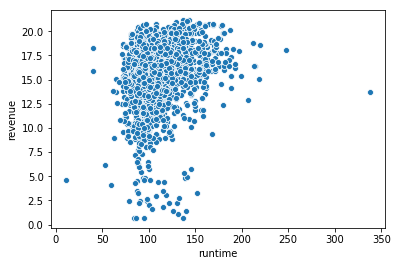

In [0]:
sns.scatterplot(train['runtime'],np.log1p(train['revenue']))

In [0]:
scaler = MinMaxScaler() 
x = train[['runtime']].values.astype(float)
scaled_values = scaler.fit_transform(x) 
train['runtime'] = scaled_values

scaler = MinMaxScaler() 
x = test[['runtime']].values.astype(float)
scaled_values = scaler.fit_transform(x) 
test['runtime']= scaled_values

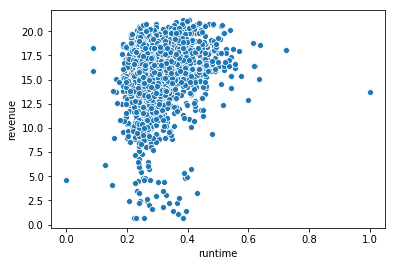

In [0]:
sns.scatterplot(train['runtime'],np.log1p(train['revenue']))

### column we need in model till now

In [0]:
train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'popularity', 'production_companies', 'production_countries', 'runtime',
       'spoken_languages', 'tagline', 'Keywords', 'cast', 'crew', 'revenue',
       'title_length', 'status_Released', 'status_Rumored',
       'status_Post Production', 'orig_lang_en', 'orig_lang_fr_hi_ru_es_ja',
       'orig_lang_it_ko_de_zh_cn', 'orig_lang_smallind',
       'release_date_years_passed', 'month2', 'month3', 'month4', 'month5',
       'month6', 'month7', 'month8', 'month9', 'month10', 'month11', 'month12',
       'weekday1', 'weekday2', 'weekday3', 'weekday4', 'weekday5', 'weekday6'],
      dtype='object')

### This method will clean feature with dictionary data.Create new feature with total number of values,onehot encoded feature

In [0]:

def clean_dictionary_features(feature_name,train,test,top_common=10):
    #convert string to dictionary
    
    train[feature_name] = train[feature_name].apply(lambda x:{} if pd.isna(x) else ast.literal_eval(str(x)))
    test[feature_name] = test[feature_name].apply(lambda x:{} if pd.isna(x) else ast.literal_eval(str(x)))
    
    #create new feature of total count of values
    train[feature_name+'_number'] = train[feature_name].apply(lambda x:len(x) if x!={} else 0)
    test[feature_name+'_number'] = test[feature_name].apply(lambda x:len(x) if x!={} else 0)
    
    #get list of all values
    list_of_values = list(train[feature_name].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
    #print(list_of_values)
    train[feature_name+'_all'] = train[feature_name].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
    
    top_values = [m[0] for m in Counter([i for j in list_of_values for i in j]).most_common(top_common)]
    #print(train[feature_name+'_all'])
    #Create one hot encoded feature
    for val in top_values:
        train[feature_name +'_'+val] = train[feature_name+'_all'].apply(lambda x: 1 if val in x else 0)
    
    test[feature_name+'_all'] = test[feature_name].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
    for val in top_values:
        test[feature_name +'_'+val] = test[feature_name+'_all'].apply(lambda x: 1 if val in x else 0)
    
#     #Create Lable encoded feature 
#     le = LabelEncoder()
#     le.fit(list(train[feature_name+'_all'].fillna('')) + list(test[feature_name+'_all'].fillna('')))
#     train[feature_name+'_all'] = le.transform(train[feature_name+'_all'].fillna('').astype(str))
#     test[feature_name+'_all'] = le.transform(test[feature_name+'_all'].fillna('').astype(str))
    return train,test

In [0]:
train,test = clean_dictionary_features('genres',train,test,10)
train,test = clean_dictionary_features('production_companies',train,test,10)
train,test = clean_dictionary_features('production_countries',train,test,10)
train,test = clean_dictionary_features('spoken_languages',train,test,10)
train,test = clean_dictionary_features('Keywords',train,test,10)
train,test = clean_dictionary_features('cast',train,test,10)
train,test = clean_dictionary_features('crew',train,test,10)

In [0]:
train.drop(['genres','production_companies','production_countries','spoken_languages','Keywords','cast','crew'],axis=1,inplace=True)
test.drop(['genres','production_companies','production_countries','spoken_languages','Keywords','cast','crew'],axis=1,inplace=True)
train.drop(['genres_all','production_companies_all','production_countries_all','spoken_languages_all','Keywords_all','cast_all','crew_all'],axis=1,inplace=True)
test.drop(['genres_all','production_companies_all','production_countries_all','spoken_languages_all','Keywords_all','cast_all','crew_all'],axis=1,inplace=True)

In [0]:
len(train.columns)

111

In [0]:
print(train.columns)

Index(['id', 'belongs_to_collection', 'budget', 'homepage', 'popularity',
       'runtime', 'tagline', 'revenue', 'title_length', 'status_Released',
       ...
       'crew_Avy Kaufman', 'crew_Robert Rodriguez', 'crew_Deborah Aquila',
       'crew_James Newton Howard', 'crew_Mary Vernieu',
       'crew_Steven Spielberg', 'crew_Luc Besson', 'crew_Jerry Goldsmith',
       'crew_Francine Maisler', 'crew_Tricia Wood'],
      dtype='object', length=111)


### Chossing the X and y and splitting

In [0]:
columns_to_keep=[]
for x in train.columns:
    if x!='id' and x!='revenue':
        columns_to_keep.append(x)
print(columns_to_keep)
X=train[columns_to_keep]
y=train['revenue']

['belongs_to_collection', 'budget', 'homepage', 'popularity', 'runtime', 'tagline', 'title_length', 'status_Released', 'status_Rumored', 'status_Post Production', 'orig_lang_en', 'orig_lang_fr_hi_ru_es_ja', 'orig_lang_it_ko_de_zh_cn', 'orig_lang_smallind', 'release_date_years_passed', 'month2', 'month3', 'month4', 'month5', 'month6', 'month7', 'month8', 'month9', 'month10', 'month11', 'month12', 'weekday1', 'weekday2', 'weekday3', 'weekday4', 'weekday5', 'weekday6', 'genres_number', 'genres_Drama', 'genres_Comedy', 'genres_Thriller', 'genres_Action', 'genres_Romance', 'genres_Crime', 'genres_Adventure', 'genres_Horror', 'genres_Science Fiction', 'genres_Family', 'production_companies_number', 'production_companies_Warner Bros.', 'production_companies_Universal Pictures', 'production_companies_Paramount Pictures', 'production_companies_Twentieth Century Fox Film Corporation', 'production_companies_Columbia Pictures', 'production_companies_Metro-Goldwyn-Mayer (MGM)', 'production_companie

In [0]:
from sklearn import model_selection
X_train, X_val, y_train, y_val = model_selection.train_test_split(X, y, test_size=0.15, random_state=41)

### First Model

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
model=RandomForestRegressor(random_state=0,n_estimators=100)
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [0]:
print(model)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)


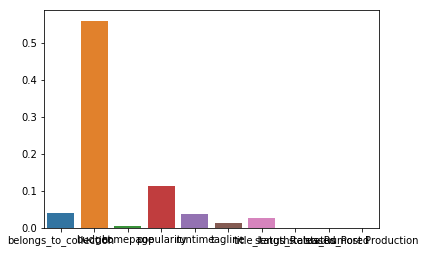

In [0]:
sns.barplot(x=X_train.columns[0:10],y=model.feature_importances_[0:10])

In [0]:
X_train.columns.shape

(109,)

In [0]:
from sklearn.metrics import r2_score

In [0]:
r2_score(y_pred=model.predict(X_train),y_true=y_train)

0.9583312207425861

In [0]:
r2_score(y_pred=model.predict(X_val),y_true=y_val)

0.685216071787333

In [0]:
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error( y_val, model.predict(X_val) ))

2.571979915326752

### Second Model

In [0]:
!pip install catboost

    100% |████████████████████████████████| 60.6MB 577kB/s 


In [0]:
import ast
from tqdm import tqdm
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.model_selection import KFold, cross_val_score, train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.feature_selection import SelectKBest,chi2
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
from xgboost.sklearn import XGBRegressor
from types import FunctionType
from xgboost import plot_importance
seed = 123

In [0]:
def select_model(X_train, X_val, y_train, y_val):

    best_models = {}
    models = [
        {
            'name': 'LinearRegression',
            'estimator': LinearRegression(),
            'hyperparameters': {},
        },
       
        {
            'name': 'GradientBoostingRegressor',
            'estimator': GradientBoostingRegressor(),
            'hyperparameters':{
                'n_estimators': range(100, 200, 10),
                'criterion': ['friedman_mse'],
                'max_depth': [3, 5, 7, 9],
                'max_features': ['log2', 'sqrt'],
                'min_samples_leaf': [1, 2, 4],
                'min_samples_split': [3, 5, 7]
            }
            
        },

        {
            'name': 'XGBoost',
            'estimator': xgb.XGBRegressor(),
            'hyperparameters':{
                'booster': ['gbtree', 'gblinear', 'dart'],
                'max_depth': range(5, 50, 5),
                'n_estimators': [200],
                'nthread': [4],
                'min_child_weight': range(1, 8, 2),
                'learning_rate': [.05, .1, .15],
            }
        },
        {
            'name': 'Light GBM',
            'estimator': lgb.LGBMRegressor(),
            'hyperparameters':{
                'max_depth': range(20, 85, 15),
                'learning_rate': [.01, .05, .1],
                'num_leaves': [300, 600, 900, 1200],
                'n_estimators': [200]
            }
        }
    ]
    
    for model in tqdm(models):
        print('\n', '-'*25, '\n', model['name'])
        start = time.perf_counter()
        grid = GridSearchCV(model['estimator'], param_grid=model['hyperparameters'], cv=5, scoring = "neg_mean_squared_error", verbose=False, n_jobs=-1)
        grid.fit(X_train, y_train)
        best_models[model['name']] = {'score': grid.best_score_, 'params': grid.best_params_}
        mse_val = mean_squared_error(y_val, grid.predict(X_val))
        mse_train = mean_squared_error(y_train, grid.predict(X_train))
        print("RMSLE train:{}".format(np.sqrt(mse_train))) 
        print("RMSLE validation:{}".format(np.sqrt(mse_val)))
        print("best_params_:{}".format(grid.best_params_))
        run = time.perf_counter() - start
        
        
    return best_models

In [0]:
def get_best_parameters(train,features_list):

    X_train = train[features_list]
    y_train = np.log1p(train["revenue"]).values
      
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=1)

    models = select_model(X_train, X_val, y_train, y_val)
    return models

In [0]:
# A class that will define all the regression models as methods

class Models(object):
    
    
    
    # Initialization 
    def __init__(self, x_train, x_validation, y_train, y_validation):
        # changing input as dataframe to list
        self.x_train = [x_train.iloc[i].tolist() for i in range(len(x_train))]
        self.x_validation = [x_validation.iloc[i].tolist() for i in range(len(x_validation))]
        self.y_train = y_train.tolist()
        self.y_validation = y_validation.tolist()
        
    
    
    @staticmethod
    def print_info(cross_val_scores, mse_train,mse_val):
        print("Cross Validation Scores: ", cross_val_scores)
        print("RMSLE train:{}".format(np.sqrt(mse_train))) 
        print("RMSLE validation:{}".format(np.sqrt(mse_val)))
        #print("Mean Squared Error: ", np.sqrt(mse))
        
        
  
    # Gradient Boosting Regressor
    def GBR(self, x_train, x_validation,  y_train, y_validation):
        gbr = GradientBoostingRegressor(n_estimators=120, learning_rate=0.08,max_features='sqrt',criterion='friedman_mse',
                                        min_samples_leaf=1,min_samples_split=3, max_depth=7, random_state=seed)
        gbr.fit(self.x_train, self.y_train)
        kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
        cross_val_scores = cross_val_score(gbr, self.x_train, self.y_train, cv=kfold)
        mse_val = mean_squared_error(self.y_validation, gbr.predict(self.x_validation))
        mse_train = mean_squared_error(self.y_train, gbr.predict(self.x_train))
        print('\nGradient Boosting Regressor')
        self.print_info(cross_val_scores, mse_train,mse_val)
        return cross_val_scores, mse_val, gbr
    
    
    # LGBM Regressor 
    def lgbm(self, x_train, x_validation,  y_train, y_validation):
        lgbm =lgb.LGBMRegressor(n_estimators=10000,objective="regression", metric="rmse",num_leaves=20, 
                             min_child_samples=100,learning_rate=0.01, bagging_fraction=0.8,feature_fraction=0.8, 
                             bagging_frequency=1,importance_type='gain', bagging_seed=seed,subsample=.9, 
                             colsample_bytree=.9,use_best_model=True)
                                
        lgbm.fit(x_train, y_train,eval_set=(x_validation, y_validation),verbose=False)
    
        kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
        cross_val_scores = cross_val_score(lgbm, self.x_train, self.y_train, cv=kfold)
        mse_val = mean_squared_error(self.y_validation, lgbm.predict(self.x_validation))
        mse_train = mean_squared_error(self.y_train, lgbm.predict(self.x_train))
        print('\nLGBM Regressor')
        self.print_info(cross_val_scores, mse_train,mse_val)
        return cross_val_scores, mse_val, lgbm
    
    
    # XgBoost Regressor 
    def xgBoost(self, x_train, x_validation,  y_train, y_validation):
        params = {'objective': 'reg:linear','eta': 0.01,'max_depth': 6,'subsample': 0.6,'colsample_bytree': 0.7,  
              'eval_metric': 'rmse', 'seed': seed,'silent': True,}
    
        record = dict()
        xg = xgb.train(params, xgb.DMatrix(x_train, y_train), 100000, [(xgb.DMatrix(x_train, y_train), 'train'),
                                                                      (xgb.DMatrix(x_validation, y_validation), 'valid')]
                      , verbose_eval=False, early_stopping_rounds=500, callbacks = [xgb.callback.record_evaluation(record)])
        best_idx = np.argmin(np.array(record['valid']['rmse']))
    
        #kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
        #cross_val_scores = cross_val_score(xg, self.x_train, self.y_train, cv=kfold)
        cross_val_scores= 0
        mse_val = mean_squared_error(self.y_validation, xg.predict(xgb.DMatrix(x_validation), ntree_limit=xg.best_ntree_limit))
        mse_train = mean_squared_error(self.y_train, xg.predict(xgb.DMatrix(x_train), ntree_limit=xg.best_ntree_limit))
        print('\nXgBoost Regressor')
        self.print_info(cross_val_scores, mse_train,mse_val)
        #plot_importance(xg)
        #plt.show()
        return cross_val_scores, mse_val, xg

In [0]:
def evaluate_models(train, test,features_list):

    X_train = train[features_list]
    y_train = np.log1p(train["revenue"]).values
      
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=1)

    methods = [x for x, y in Models.__dict__.items() if type(y) == FunctionType]
    methods.remove('__init__')
    # Now calling the all regression methods
    cross_scores_list, mse_list = [], []
    models = {}
    for model in methods:
        reg = Models(X_train, X_val, y_train, y_val)
        cross_val_scores, mse, return_model = getattr(reg, model)(X_train, X_val, y_train, y_val)
        cross_scores_list.append(cross_val_scores)
        models[model] = return_model
        mse_list.append(mse)
    return models

In [0]:
all_features_models = evaluate_models(train, test,list(columns_to_keep))


Gradient Boosting Regressor
Cross Validation Scores:  [0.54507917 0.54248347 0.49527378 0.51099937 0.51677286 0.46311586
 0.50020566 0.59002745 0.52833085 0.54294953]
RMSLE train:0.9145673444617535
RMSLE validation:1.796344761428888

LGBM Regressor
Cross Validation Scores:  [0.60867095 0.56010525 0.52549836 0.56901711 0.54907714 0.41165107
 0.48291396 0.54064348 0.48613238 0.53076337]
RMSLE train:0.6047663773562049
RMSLE validation:1.8373720716779625

XgBoost Regressor
Cross Validation Scores:  0
RMSLE train:1.0307909159917084
RMSLE validation:1.767739622254152


In [0]:
def calculate_test_results(models,test,model_names,features_list):
        
    X_test = test[features_list]
    pred = np.empty(shape=len(X_test)).tolist()
    
    for model in model_names:
        mod = models[model]
        if(model=='xgBoost'):
            pred = pred + np.expm1(mod.predict(xgb.DMatrix(X_test), ntree_limit=mod.best_ntree_limit))
        else:   
            pred = pred + np.expm1(mod.predict(X_test))
    
    return pred

In [0]:
xgBoost_results = calculate_test_results(all_features_models,test,['xgBoost'],list(columns_to_keep))
gbr_results = calculate_test_results(all_features_models,test,['GBR'],list(columns_to_keep))
lgbm_results = calculate_test_results(all_features_models,test,['lgbm'],list(columns_to_keep))

#final_pred = 0.4*xgBoost_results + 0.4*gbr_results + 0.2*lgbm_results 2.07
#final_pred = 0.7*xgBoost_results + 0.3*gbr_results 2.03
#final_pred = 0.3*xgBoost_results + 0.7*gbr_results 2.08
#final_pred = 0.5*xgBoost_results + 0.3*gbr_results + 0.2*lgbm_results 2.08
#final_pred = 0.6*xgBoost_results + 0.2*gbr_results + 0.2*lgbm_results  2.06723
#final_pred = 0.8*xgBoost_results + 0.2*gbr_results 2.02
final_pred = 0.8*xgBoost_results + 0.2*lgbm_results 1.98561
#final_pred = 0.9*xgBoost_results + 0.1*gbr_results
#final_pred = xgBoost_results  2.05923

In [0]:
submission = pd.DataFrame()
submission['id'] = test['id']
submission['revenue'] = final_pred
submission.to_csv('submission.csv', index=False)

In [0]:
from google.colab import files
files.download('submission.csv')

### Submitting the solution

In [0]:
X_test=test[columns_to_keep].copy()

In [0]:
X_test.head()

,belongs_to_collection,budget,homepage,popularity,runtime,tagline,title_length,status_Released,status_Rumored,status_Post Production,...,crew_Avy Kaufman,crew_Robert Rodriguez,crew_Deborah Aquila,crew_James Newton Howard,crew_Mary Vernieu,crew_Steven Spielberg,crew_Luc Besson,crew_Jerry Goldsmith,crew_Francine Maisler,crew_Tricia Wood
0,1,0.000000,1,1.579295,0.220339,51,28,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,11.385103,0,1.517276,0.135593,96,27,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.000000,0,2.206646,0.254237,41,16,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,15.732433,1,2.261348,0.355932,55,9,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,14.508658,0,1.439285,0.227119,221,18,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
y_pred=model.predict(X_test)

In [0]:
len(y_pred)

4398

In [0]:
X_test.shape

(4398, 109)

In [0]:
id=test['id']

In [0]:
ans={'id':id,'revenue':y_pred}
ans=pd.DataFrame(ans)

In [0]:
ans.head()

,id,revenue
0,3001,19850013.20
1,3002,15468227.67
2,3003,10425585.86
3,3004,44476383.85
4,3005,5570618.62


In [0]:
ans.to_csv('pred.csv',index=False)

In [0]:
from google.colab import files
files.download('pred.csv')